<a href="https://colab.research.google.com/github/Naman63772/Candev/blob/master/live_(v3)_Intro_to_DS_day_codealong_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **BrainStation Data Science Intro Day** </center>

## **Session 1: Basic Python & DataFrames**

Here we will cover some of the fundamentals of the programming language [Python](https://en.wikipedia.org/wiki/Python_(programming_language)), leading up to working with data. 

Python can print outputs:

In [22]:
print('hello world!')

hello world!


It can also do basic mathematical operations like a calculator:

In [23]:
2+2

4

In [24]:
print(2+2)
print(2-2)
print(2*2)
print(2/2)

4
0
4
1.0


Pieces of data (like `"hello"` or `3.14` or `True` or `55`) can be saved in **variables**. This makes it easier to reference them in our code later on:

In [25]:
# We make variable assignments with a single equals sign, =
x = 55

In [26]:
print(x)

55


We can then operate on or mutate said variables (subject to type constraints):

In [27]:
print(x*3)

165


In [28]:
y = 'hello'

In [29]:
print(y)

hello


In [30]:
print(y*3)

hellohellohello


In [31]:
print(x, y)

55 hello


### **Errors**

We will regularly encounter errors when we're working in Python, and you shouldn't be afraid of them! They're informative and they help us figure out what might be going wrong in our code.

### **Lists**

Lists are a type of "container" in Python (technically, a *data structure* which is an array - a sequence of ordered or unordered values stored in memory). They help us hold more than one data element at a time.

In [32]:
# we create lists by enclosing our data in square brackets, []
my_list = [1, 2, 3]

In [33]:
print(my_list)

[1, 2, 3]


In [34]:
# Lists can hold any type of data
another_list = ["bitcoin", 188.7, False]

print(another_list)

['bitcoin', 188.7, False]


We can access individual items from our lists using square bracket indexing. Python starts its index counts at 0:

In [35]:
another_list[0]

'bitcoin'

In [36]:
another_list[1]

188.7

In [37]:
another_list[2]

False

In [38]:
_1 = 1

### **Looping**

This is a technique that we can use to access each list item one-at-a-time, in succession. For example, rather than printing out each list item manually like we did above, we could use a loop:

In [39]:
for item in another_list:
    print(item)

bitcoin
188.7
False


In [40]:
# Note that the loop variable name we choose is totally up to us.
# This is the exact same loop as above
for whatever in another_list:
    print(whatever)

bitcoin
188.7
False


We'll explore two Python packages for working with data. The first is called [**Pandas**](https://pandas.pydata.org/), and gives us the ability to load in, manipulate and analyze tables of data. The second is called [**Seaborn**](https://seaborn.pydata.org/), which is a package dedicated to data visualization.

First thing's first, we'll need to load in some data. We can read in data directly with pandas from cloud storage in Google Drive!

In [41]:
# Let's import the packages we need to use
import pandas as pd

In [42]:
# Read in the data from Google Drive (or any public url)
url='https://drive.google.com/uc?id=1wLuyOzM81IjBSwLflfB54CSx6KxY5NAe'
df = pd.read_csv(url)

In [43]:
# Take a look
df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist
631,69UbAXVf54kgZVy1U7nJY3,...Baby One More Time - Remastered,34,210605,0,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],2009-11-09,0.752,0.771,0,-4.104,0,0.0326,0.2020,0.000247,0.669,0.896,92.980,4,Britney
632,4i09E6a5vOsIIHb7wpyftz,Candy Store Rock - Remaster,36,251373,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1976-03-31,0.570,0.927,0,-8.990,1,0.0398,0.0161,0.000115,0.100,0.789,114.817,4,Zeppelin
633,69lH8EQMuHWx9f8QKpiddJ,The Rain Song - Remaster,42,459094,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1973-03-28,0.336,0.318,0,-11.412,1,0.0263,0.3170,0.071600,0.111,0.240,79.660,4,Zeppelin
634,2hXhzBwIcrfQQUdelpLZXH,For Your Life - 1990 Remaster,49,384107,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1976-03-31,0.374,0.719,0,-9.336,1,0.1770,0.0141,0.000344,0.132,0.671,184.180,4,Zeppelin
635,39HPNIdWUse9mLDio9dxwK,The Song Remains the Same - Remaster,37,329094,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1973-03-28,0.255,0.815,7,-8.197,1,0.0545,0.0747,0.471000,0.227,0.699,144.549,4,Zeppelin


In [44]:
# What does `df.head()` do?
?df.head()

This dataset is collected from Spotify's API: We requested data about songs from any artist whose artist contains `Drake`, `Britney Spears` or `Led Zeppelin`.

Spotify's API returns a rich set of data about each song's audio properties. These are the audio qualities they use to capture a song's feel and generate playlists geared to a user's tastes.

## **Our investigative goal:** 
## <center> What are the audio attributes that distiguish these three artists from one another? </center>

## **Session 2: Exploring data & identifying trends**

In [45]:
# Remind ourselves of the dataset
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist
0,1PWnjvzT5Jhpfnh96DRNDh,Best I Ever Had,51,258800,0,['Drake'],['3TVXtAsR1Inumwj472S9r4'],2009-01-01,0.441,0.904,1,-2.636,1,0.3590,0.102,0.0000,0.1960,0.529,161.740,4,Drake
1,32nmTtZNtJq2LQQJlYc96h,My Only Wish (This Year),4,254720,0,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],2007-11-30,0.667,0.715,0,-8.017,1,0.0269,0.184,0.0000,0.1860,0.678,147.064,4,Britney
2,6nx1JCehhu4N9j5qNALyTu,The Crunge - Remaster,34,197704,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1973-03-28,0.531,0.798,2,-8.514,1,0.1480,0.132,0.0000,0.3560,0.852,112.609,5,Zeppelin
3,4pW4DF1119GLHiuWE7Jcb4,Thank You - Remaster,48,289485,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1969-10-22,0.292,0.306,7,-13.158,1,0.0547,0.184,0.0046,0.1440,0.131,79.406,4,Zeppelin
4,1pYKzfOlpHWtVUiEIu4Vn7,What's My Name?,53,263173,0,"['Rihanna', 'Drake']","['5pKCCKE2ajJHZ9KAiaK11H', '3TVXtAsR1Inumwj472...",2010-11-15,0.695,0.782,2,-2.967,1,0.0629,0.223,0.0000,0.0773,0.595,99.992,4,Drake


In [46]:
# How many rows and columns?
df.shape

(636, 21)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                636 non-null    object 
 1   name              636 non-null    object 
 2   popularity        636 non-null    int64  
 3   duration_ms       636 non-null    int64  
 4   explicit          636 non-null    int64  
 5   artists           636 non-null    object 
 6   id_artists        636 non-null    object 
 7   release_date      636 non-null    object 
 8   danceability      636 non-null    float64
 9   energy            636 non-null    float64
 10  key               636 non-null    int64  
 11  loudness          636 non-null    float64
 12  mode              636 non-null    int64  
 13  speechiness       636 non-null    float64
 14  acousticness      636 non-null    float64
 15  instrumentalness  636 non-null    float64
 16  liveness          636 non-null    float64
 1

Looks like we have a lot of numerical attributes. Let's get a feel for them.

In [48]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,636.00000,6.360000e+02,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,51.97327,2.799651e+05,0.375786,0.556667,0.644586,4.687107,-8.618330,0.691824,0.129658,0.203935,0.072349,0.210039,0.472629,119.558011,3.926101
std,17.36802,1.146586e+05,0.484706,0.183620,0.198221,3.530460,3.164313,0.462103,0.128858,0.232138,0.201934,0.181720,0.237876,29.509409,0.411501
min,0.00000,9.837300e+04,0.000000,0.177000,0.172000,0.000000,-18.524000,0.000000,0.024500,0.000052,0.000000,0.028600,0.037100,65.041000,1.000000
25%,40.00000,2.163600e+05,0.000000,0.405500,0.487750,2.000000,-10.384250,0.000000,0.043650,0.031850,0.000000,0.098650,0.293500,96.131000,4.000000
50%,53.00000,2.552265e+05,0.000000,0.545000,0.661000,4.000000,-8.435000,1.000000,0.066150,0.103000,0.000085,0.138000,0.448000,113.879500,4.000000
75%,64.00000,3.113078e+05,1.000000,0.704000,0.824000,8.000000,-6.387500,1.000000,0.170000,0.300000,0.011900,0.252000,0.662000,141.657500,4.000000
max,91.00000,1.758307e+06,1.000000,0.963000,0.979000,11.000000,-1.304000,1.000000,0.730000,0.970000,0.949000,0.967000,0.976000,205.470000,5.000000


Let's explore some of these columns. We'll check the top songs across a few of them.

In [49]:
df.sort_values(by='popularity', ascending=False).head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist
619,3aQem4jVGdhtg116TmJnHz,What’s Next,91,178154,1,['Drake'],['3TVXtAsR1Inumwj472S9r4'],2021-03-05,0.781,0.594,0,-6.959,0,0.0485,0.0136,0.000000,0.162,0.0628,129.895,4,Drake
501,65OVbaJR5O1RmwOQx0875b,Wants and Needs (feat. Lil Baby),89,192956,1,"['Drake', 'Lil Baby']","['3TVXtAsR1Inumwj472S9r4', '5f7VJjfbwm532GiveG...",2021-03-05,0.578,0.449,1,-6.349,1,0.2860,0.0618,0.000002,0.119,0.1000,136.006,4,Drake
454,2SAqBLGA283SUiwJ3xOUVI,Laugh Now Cry Later (feat. Lil Durk),88,261493,1,"['Drake', 'Lil Durk']","['3TVXtAsR1Inumwj472S9r4', '3hcs9uc56yIGFCSy9l...",2020-08-14,0.761,0.518,0,-8.871,1,0.1340,0.2440,0.000035,0.107,0.5220,133.976,4,Drake
398,6EDO9iiTtwNv6waLwa1UUq,POPSTAR (feat. Drake),86,200221,1,"['DJ Khaled', 'Drake']","['0QHgL1lAIqAw0HtD7YldmP', '3TVXtAsR1Inumwj472...",2020-07-17,0.800,0.560,5,-4.818,0,0.2610,0.0570,0.000000,0.134,0.4500,163.071,4,Drake
254,4FRW5Nza1Ym91BGV4nFWXI,Lemon Pepper Freestyle (feat. Rick Ross),86,383037,1,"['Drake', 'Rick Ross']","['3TVXtAsR1Inumwj472S9r4', '1sBkRIssrMs1AbVkOJ...",2021-03-05,0.770,0.637,1,-5.530,1,0.3450,0.1030,0.000000,0.171,0.4310,94.966,4,Drake


In [50]:
?df.sort_values

In [51]:
df.sort_values(by='duration_ms', ascending=False).head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist
416,0OotzYWTwTqoszW9MrXSdZ,Dazed and Confused - (Live at MSG 1973) [Remas...,40,1758307,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1976-10-22,0.307,0.897,0,-8.595,1,0.1060,0.007400,0.49900,0.942,0.218,125.893,4,Zeppelin
30,76HR8Ox6ApIoipqrXDheZ3,"Dazed and Confused - Live in Paris, 1969",28,901640,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1969-01-12,0.271,0.642,2,-10.107,1,0.0778,0.000893,0.27700,0.634,0.125,125.768,4,Zeppelin
450,2EbfJIOLyZcyHEZosJC0dT,Whole Lotta Love - (Live at MSG 1973) [Remaster],37,832027,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1976-10-22,0.291,0.942,9,-7.912,1,0.1650,0.004500,0.03830,0.890,0.395,105.117,4,Zeppelin
383,4EUe6BsZm5wZLxOTaV3kDX,In My Time of Dying - Remaster,39,668441,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1975-02-24,0.348,0.865,2,-9.727,1,0.0625,0.262000,0.00279,0.121,0.471,102.078,4,Zeppelin
63,5g9VOUgrn7ozYE3ZQm8w41,In My Time of Dying - 1990 Remaster,52,665600,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1975-02-24,0.330,0.843,2,-10.221,1,0.0581,0.137000,0.00586,0.199,0.474,101.855,4,Zeppelin


Hmmm... we notice here that duration is tracked in milliseconds. This is useful in some cases, but not very interpretable to a human reader. We'll calculate a new column for duration in minutes.

In [52]:
# Calculate duration in minutes (1 min = 60 seconds = 60,000 ms)
df['duration_mins'] = df['duration_ms'] / 1000 / 60

In [53]:
df[['name', 'artists', 'duration_mins']]

,name,artists,duration_mins
0,Best I Ever Had,['Drake'],4.313333
1,My Only Wish (This Year),['Britney Spears'],4.245333
2,The Crunge - Remaster,['Led Zeppelin'],3.295067
3,Thank You - Remaster,['Led Zeppelin'],4.824750
4,What's My Name?,"['Rihanna', 'Drake']",4.386217
...,...,...,...
631,...Baby One More Time - Remastered,['Britney Spears'],3.510083
632,Candy Store Rock - Remaster,['Led Zeppelin'],4.189550
633,The Rain Song - Remaster,['Led Zeppelin'],7.651567
634,For Your Life - 1990 Remaster,['Led Zeppelin'],6.401783


In [54]:
df.sort_values(by='duration_mins', ascending=False).head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist,duration_mins
416,0OotzYWTwTqoszW9MrXSdZ,Dazed and Confused - (Live at MSG 1973) [Remas...,40,1758307,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1976-10-22,0.307,0.897,0,-8.595,1,0.1060,0.007400,0.49900,0.942,0.218,125.893,4,Zeppelin,29.305117
30,76HR8Ox6ApIoipqrXDheZ3,"Dazed and Confused - Live in Paris, 1969",28,901640,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1969-01-12,0.271,0.642,2,-10.107,1,0.0778,0.000893,0.27700,0.634,0.125,125.768,4,Zeppelin,15.027333
450,2EbfJIOLyZcyHEZosJC0dT,Whole Lotta Love - (Live at MSG 1973) [Remaster],37,832027,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1976-10-22,0.291,0.942,9,-7.912,1,0.1650,0.004500,0.03830,0.890,0.395,105.117,4,Zeppelin,13.867117
383,4EUe6BsZm5wZLxOTaV3kDX,In My Time of Dying - Remaster,39,668441,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1975-02-24,0.348,0.865,2,-9.727,1,0.0625,0.262000,0.00279,0.121,0.471,102.078,4,Zeppelin,11.140683
63,5g9VOUgrn7ozYE3ZQm8w41,In My Time of Dying - 1990 Remaster,52,665600,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1975-02-24,0.330,0.843,2,-10.221,1,0.0581,0.137000,0.00586,0.199,0.474,101.855,4,Zeppelin,11.093333


In [55]:
# Let's round those numbers
df['duration_mins'] = round(df['duration_mins'], 2)

In [56]:
df[['name', 'artists', 'duration_mins']].sort_values(by='duration_mins', ascending=False).head(10)

,name,artists,duration_mins
416,Dazed and Confused - (Live at MSG 1973) [Remas...,['Led Zeppelin'],29.31
30,"Dazed and Confused - Live in Paris, 1969",['Led Zeppelin'],15.03
450,Whole Lotta Love - (Live at MSG 1973) [Remaster],['Led Zeppelin'],13.87
383,In My Time of Dying - Remaster,['Led Zeppelin'],11.14
63,In My Time of Dying - 1990 Remaster,['Led Zeppelin'],11.09
144,Moby Dick - (Live at MSG 1973) [Remaster],['Led Zeppelin'],11.04
286,Stairway to Heaven - (Live at MSG 1973) [Remas...,['Led Zeppelin'],10.88
222,No Quarter - (Live at MSG 1973) [Remaster],['Led Zeppelin'],10.64
406,Carouselambra - Remaster,['Led Zeppelin'],10.57
349,Achilles Last Stand - Remaster,['Led Zeppelin'],10.53


In [57]:
# How many songs from each artist?
df['artists'].value_counts()

['Led Zeppelin']                  293
['Drake']                         103
['Britney Spears']                 58
['Drake', 'Lil Wayne']              9
['Lil Wayne', 'Drake']              8
                                 ... 
['Alicia Keys', 'Drake']            1
['Rick Ross', 'Wale', 'Drake']      1
['Britney Spears', 'Madonna']       1
['French Montana', 'Drake']         1
['Summer Walker', 'Drake']          1
Name: artists, Length: 107, dtype: int64

This is messy! 

Notice how Drake/Lil Wayne is being counted as a different artist than Lil Wayne/Drake. And in fact, any song with more than one artist is being counted separately than the main artist themselves.

Luckily we have a column called `main_artist`, otherwise this dataset would require some careful cleaning:

In [58]:
df['main_artist'].value_counts()

Zeppelin    293
Drake       275
Britney      68
Name: main_artist, dtype: int64

Let's proceed with some visual exploration of the features.

In [59]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'main_artist',
       'duration_mins'],
      dtype='object')

We will import [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) to help us with our visualizations. Some matplotlib code is built into pandas so we can visualize directly from a dataframe:

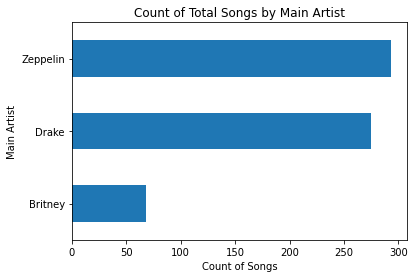

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count per main artist, sort in descending order and plot
df['main_artist'].value_counts().sort_values().plot(kind='barh')
# Add axes labels and title and plot
plt.title('Count of Total Songs by Main Artist')
plt.ylabel('Main Artist')
plt.xlabel('Count of Songs')
plt.show()

For numerical columns (like `popularity` and most of our other song metrics), our best visual is a histogram which shows the count of songs across the range of values for each metric. We can do these using a single line from seaborn:

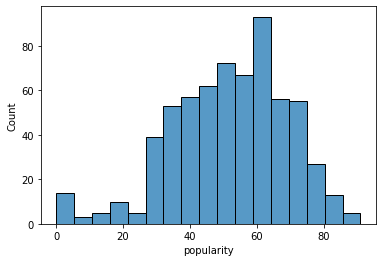

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of popularity values
sns.histplot(x='popularity', data=df);

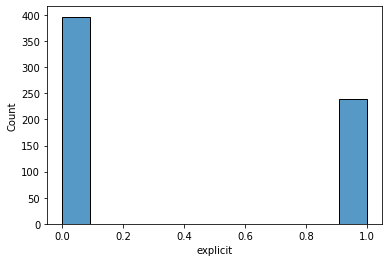

In [62]:
# Histogram of 'explicit' values
sns.histplot(x='explicit', data=df);

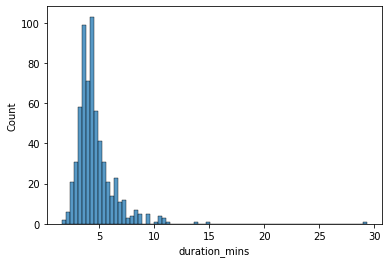

In [63]:
sns.histplot(x='duration_mins', data=df);

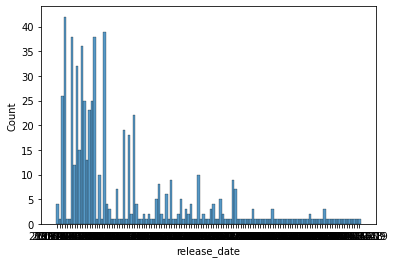

In [64]:
sns.histplot(x='release_date', data=df);

Hmm... might be more interesting to look at distribution of release year, or release month, rather than day-by-day distributions.

In [65]:
# Engineer a new column for release year and release month
df['release_date'] = pd.to_datetime(df['release_date'])

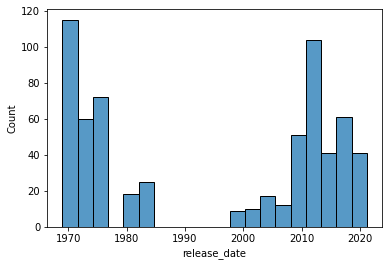

In [66]:
sns.histplot(x='release_date', data=df, bins=20);

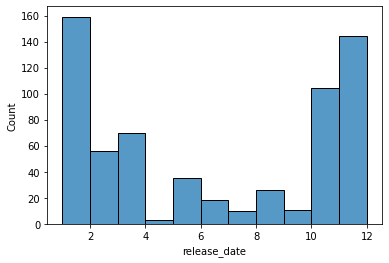

In [67]:
sns.histplot(df['release_date'].dt.month);

Look how similar our code is for visualizing these columns! The only thing we need to change in each command is the column name. This is an opportunity to use loops to make our exploration more efficient!

In [68]:
# We already have list of column names
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'main_artist',
       'duration_mins'],
      dtype='object')

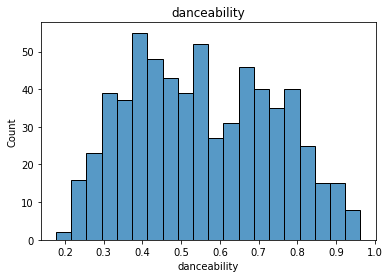

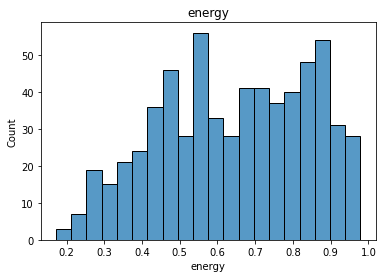

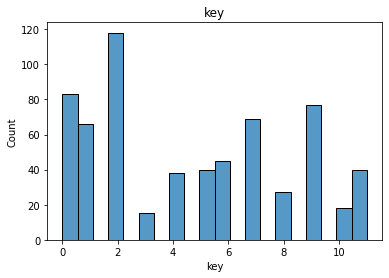

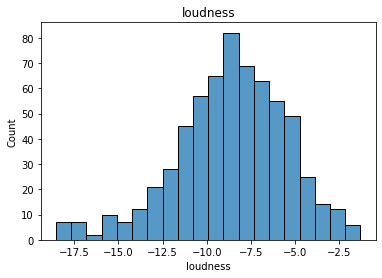

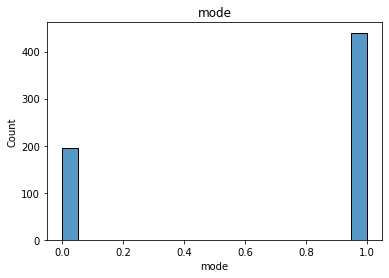

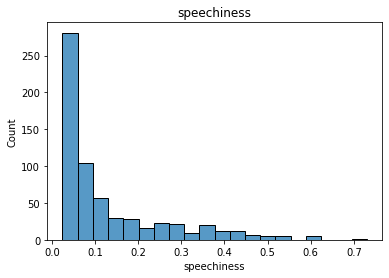

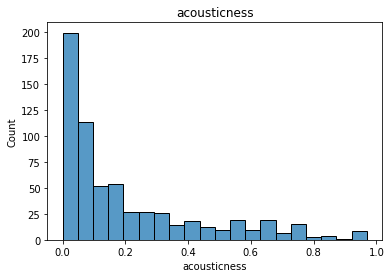

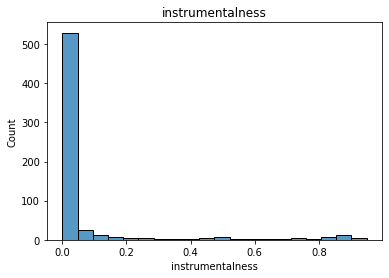

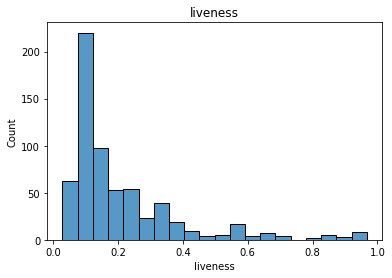

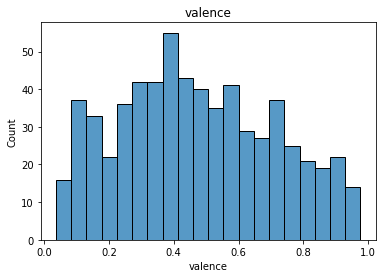

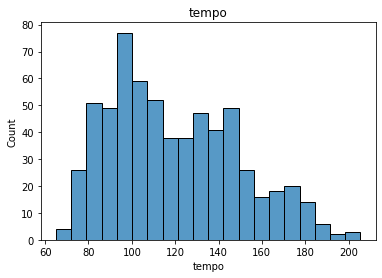

In [69]:
# Let's be more selective though

# Define a list of interesting columns of numerical data
interesting_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Loop through this list, creating a histogram of each one
for col in interesting_columns:

    # Plot
    sns.histplot(x=col, data=df, bins=20)
    plt.title(col)
    plt.show()

    print('\n')

Remember our investigative goal: What are the audio attributes that distiguish these three artists from one another?

Let's start to see **how these attributes differ by artist**. We'll filter our set of columns to just these core audio attributes:

In [70]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'main_artist',
       'duration_mins'],
      dtype='object')

In [71]:
audio_columns = ['popularity', 'duration_mins', 'key', 'danceability', 'energy', 'loudness', 
                 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                 'time_signature']

We can do this investigation using data visualization. Let's make a bar chart of average popularity per artist. Any hypotheses to start?

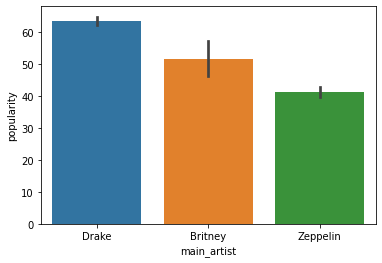

In [72]:
sns.barplot(x='main_artist', y='popularity', data=df);

The bar height represents the average popularity score, and the black lines represent the standard deviation of the popularity scores.

Looks like despite Led Zeppelin being the least popular overall by Spotify standards, Britney songs have a wider range in popularity.

If we want a more granular look at these metrics, we can turn to statistical plots like a boxplot:

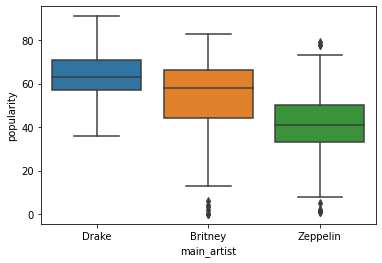

In [73]:
sns.boxplot(x='main_artist', y='popularity', data=df);

Boxplots show us the median, 1st and 3rd quartile of our data -- great for understanding its central tendencies. The "whiskers" show us the extent of the data up until seaborn determines we've entered the range of outlier points, which are represented by individual dots. (1.5 * the interquartile range). Boxplots are a much more condensed way of depicting information about a distribution of a variable across categories, as could be done with multiple histograms as below:

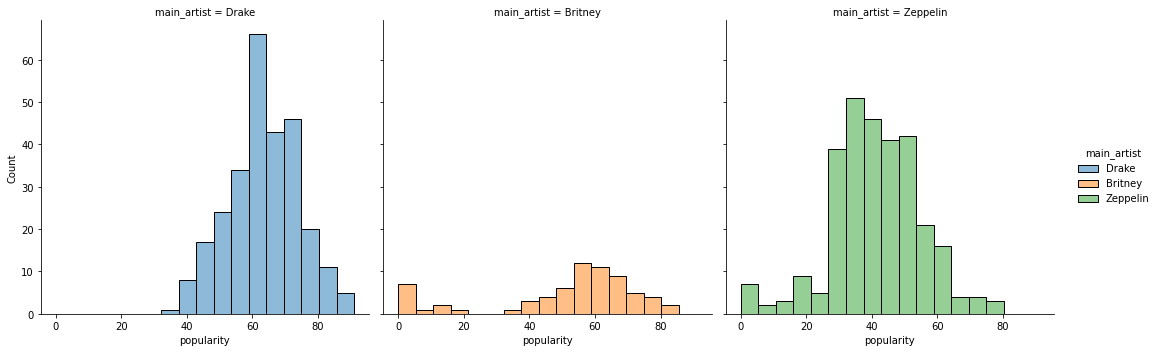

In [74]:
sns.displot(x='popularity', hue='main_artist', col='main_artist', data=df)
plt.show()

We can go even further with a strip plot. Here each point is plotted for its corresponding y-value, separated on the x-axis into the categories as with the boxplot. The horizontal position of the point for each category is not important, only to allow us to see all the data with minimal overlapping. We can also control the size of the plotted points, here with the `s=3` argument.

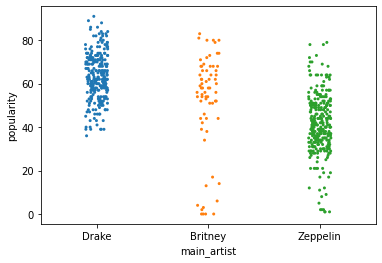

In [75]:
sns.stripplot(x='main_artist', y='popularity', data=df, s=3);

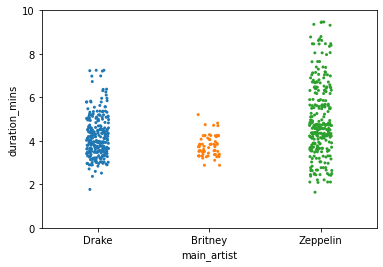

In [76]:
# Let's do the same for duration
sns.stripplot(x='main_artist', y='duration_mins', data=df, s=3)
plt.ylim(0,10) # restricts the range of the y-axis from 0 to 10
plt.show()

Notice how similar our code is across these visualizations again? All we need is to swap in a different column name in the `stripplot` function. Time to use more loops!

In [77]:
audio_columns

['popularity',
 'duration_mins',
 'key',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

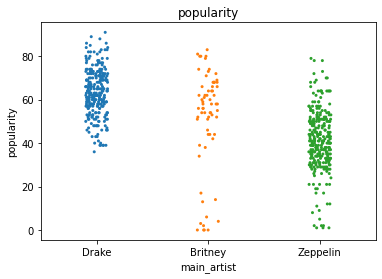

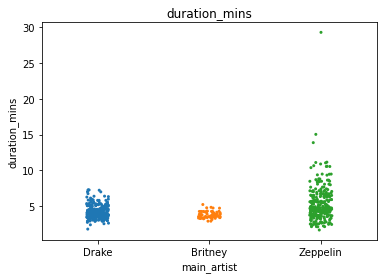

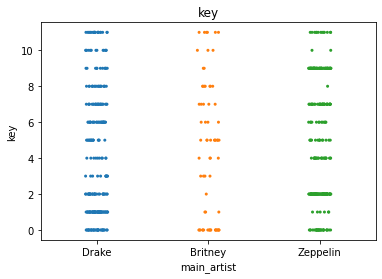

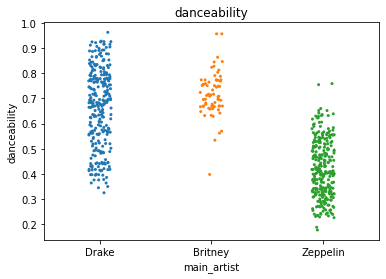

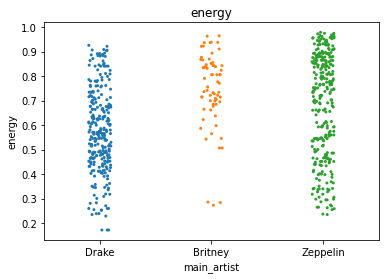

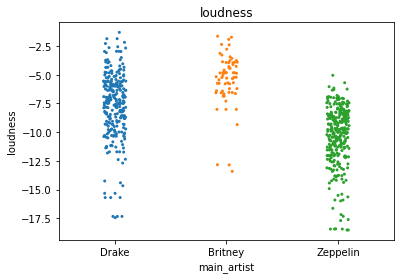

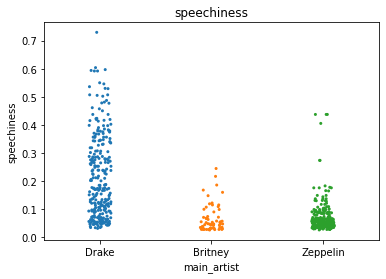

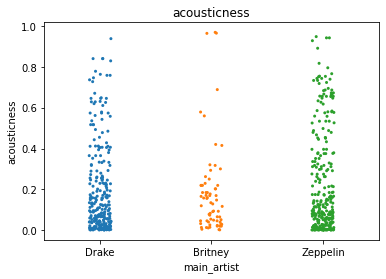

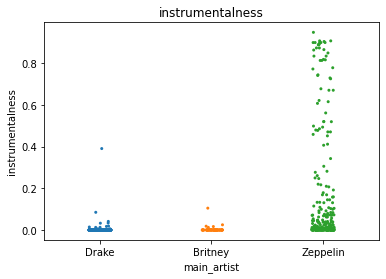

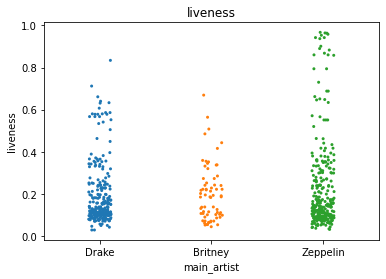

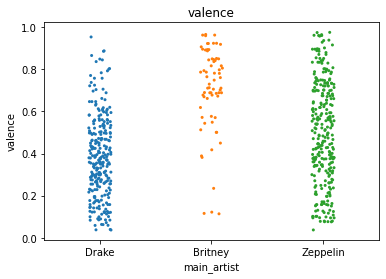

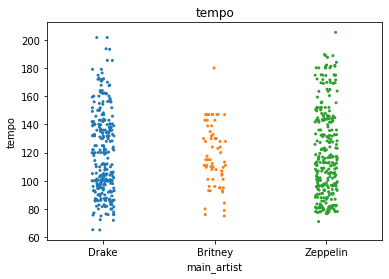

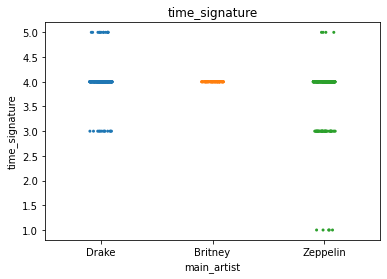

In [78]:
# for each column name in our list
for column in audio_columns:

    # draw a strip plot with an informative title
    sns.stripplot(x='main_artist', y = column, data=df, s=3)
    plt.title(column)
    plt.show()

    # and print a blank line for extra space
    print('\n')

Looks like there’s clear differences between artists across some of these metrics. This makes me wonder: Given some song data from an unknown artist, could I predict which of these three it’s most likely to be?

I suspect that if we **did** receive some of these audio statistics but didn't know which artist it belongs to, we could classify it. We can do that with only a few lines of code in [scikit-learn](https://scikit-learn.org/stable/), the machine learning package for python:

In [79]:
print(audio_columns)

['popularity', 'duration_mins', 'key', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [80]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Pull out the main artist as the target to be predicted and the audio columns
y = df['main_artist']
X = df[audio_columns]

# Instantiate and fit a model
lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)

# Calculate the accuracy score (%)
np.round(lr.score(X,y)*100.0,3)

91.981

Given the audio features provided, we can predict with ~92% accuracy which artist performed the song--**amazing**! And this is just scratching the surface of what machine learning can do...